In [1]:
%autosave 0
from __future__ import absolute_import, division, print_function
%pylab inline


import cv2
import scipy.misc
import skimage.util

import numpy as np
import glob
import os.path
import xml.etree.ElementTree as ET
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.io
import random
from scipy import ndimage
from skimage import io
from skimage import transform
import math

from PIL import Image, ImageEnhance
from scipy import signal
from sklearn import preprocessing
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')


Autosave disabled
Populating the interactive namespace from numpy and matplotlib


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [2]:
# vocabulary = {}
# vocabulary_path = "some.mat"
def getIndex(c,voc):
    for name, age in voc.iteritems():
        if age == c:
            return name
    print("-"*30,"error-",c)
    return None

# if os.path.exists(vocabulary_path):
#     imgs=scipy.io.loadmat(vocabulary_path)['vocabulary']
# else:
#     nrC=1
#     vocabulary['%%'] = 0 
#     '''
#     c = '0'
    
#     while ord(c) != ord('9')+1:
#         vocabulary[c] = nrC
#         nrC = nrC + 1
#         c = chr(ord(c)+1)
#     c = 'A'
#     while ord(c) != ord('Z')+1:
#         vocabulary[c] = nrC
#         nrC = nrC + 1
#         c = chr(ord(c)+1)
#     '''
#     c = 'a'
#     while ord(c) != ord('z')+1:
#         vocabulary[c] = nrC
#         nrC = nrC + 1
#         c = chr(ord(c)+1)
#     '''
#     cr = [',','.','"','\'',' ','-','#','(',')',';','?',':','*','&','!','/','']
#     for c in cr:
#         vocabulary[c] = nrC
#         nrC = nrC + 1
#     '''
#     vocabulary[' '] = nrC
#     nrC += 1
#     vocabulary[''] = nrC

In [3]:
vocabulary = {' ': 0, '!': 1, '"': 2, '#': 3, '&': 4, "'": 5, '(': 6, ')': 7,
              '*': 8, '+': 9, ',': 10, '-': 11, '.': 12, '/': 13, '0': 14,
              '1': 15, '2': 16, '3': 17, '4': 18, '5': 19, '6': 20, '7': 21,
              '8': 22, '9': 23, ':': 24, ';': 25, '<': 26, '=': 27, '>': 28,
              '?': 29, 'A': 30, 'B': 31, 'C': 32, 'D': 33, 'E': 34, 'F': 35,
              'G': 36, 'H': 37, 'I': 38, 'J': 39, 'K': 40, 'L': 41, 'M': 42,
              'N': 43, 'O': 44, 'P': 45, 'Q': 46, 'R': 47, 'S': 48, 'T': 49,
              'U': 50, 'V': 51, 'W': 52, 'X': 53, 'Y': 54, '[': 55, ']': 56,
              '_': 57, 'a': 58, 'b': 59, 'c': 60, 'd': 61, 'e': 62, 'f': 63,
              'g': 64, 'h': 65, 'i': 66, 'j': 67, 'k': 68, 'l': 69, 'm': 70,
              'n': 71, 'o': 72, 'p': 73, 'q': 74, 'r': 75, 's': 76, 't': 77,
              'u': 78, 'v': 79, 'w': 80, 'x': 81, 'y': 82, 'z': 83, '|': 84,
              '~': 85, '': 86}

In [4]:
def preprocessTarget(line):
    
    QUOT_TOKEN_Init = "&quot;"
    QUOT_TOKEN = '"'
           
    FIRST_INDEX = ord('a') - 4  # 0 is reserved to space

    targets = line.strip().replace(QUOT_TOKEN_Init, QUOT_TOKEN)
        
    targets = np.asarray([vocabulary[x]  for x in targets])
    
    return targets


In [5]:
maxL = 100#inaltimea
maxi=0
def processPage(nameXml,nameImg,words=False,maxW=400):
    img = cv2.imread(nameImg, cv2.IMREAD_GRAYSCALE )
    text = open(nameXml, "r").readline().replace("\n", "")
    if any([ord(i) > 127 for i in text]):
        return [None, None, None]
    
    global maxi
    letters = list()
    coords = list()
    imgs = []
    texts = []
    lengths = []

#     img = form[int(line.attrib['asy']):int(line.attrib['dsy'])]
    ret,thresh1 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

#     maxi=max(maxi,img.shape[0])
    texts.append(preprocessTarget(text))
    imgs.append(thresh1)
    lengths.append(thresh1.shape[1])
        
    return [texts,imgs,lengths]

    

1


(117, 1669)

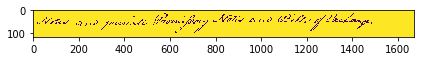

In [6]:
# nameXml = '../data_in/iamHandwriting/xml/b05-074.xml'
# nameImg = '../data_in/iamHandwriting/forms/b05-074.png'#'forms/a01-030u.png'#'forms/a01-113.png'
nameXml = "../data/Transcriptions/002_080_001_03_07.txt"
nameImg = "../data/Images_mod/002_080_001_03_07.png"

t=processPage(nameXml,nameImg,False)
#t[0]
#print (maxi)
print (len(t[0]))
#for e,i in enumerate(t[0]):
#    print(decodePrediction([[],t[0][e]]))
#plt.imshow(t[1][0])
l = 0;h = 0
plt.figure(figsize=(15,25))
for e in range(len(t[0][-9*2:])):
    l = max(l,len(t[1][e][:,0]))
    h = max(h,len(t[1][e][0]))
    plt.subplot(9,2,e+1)
    plt.imshow(t[1][e])
l,h

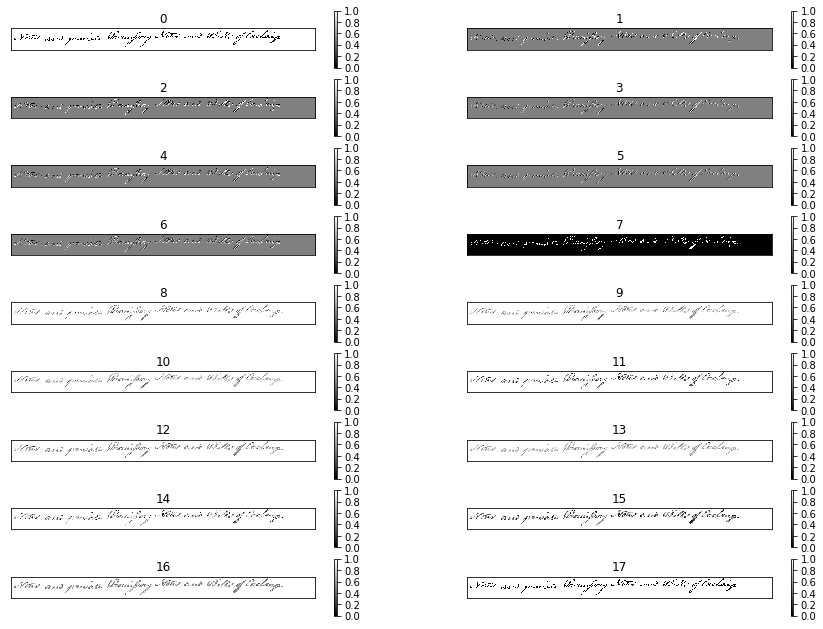

In [7]:

def get_features(img, thesh=100):
    l = [img]
    for i in range(3):
        l.append(cv2.Sobel(img,cv2.CV_64F,1,0,ksize=(i*2+1)))
        l.append(cv2.Sobel(img,cv2.CV_64F,0,1,ksize=(i*2+1)))
    for i in range(1):
        l.append(cv2.Canny(img,100+10*i,200))
    for i in range(3):#block size, ksize, k harris
        for j in range(3):
                l.append(cv2.cornerHarris(img,2+j,(i*2+1),5))
    theta, bwimg = cv2.threshold(img, 100, 255, cv2.THRESH_OTSU)
    l.append(bwimg)
    #l.append(correctSlant(img,tt=False))
    l = [(i-np.amin(i))/(np.amax(i)-np.amin(i)) for i in l]
    return l
    #p = [np.expand_dims(preprocessing.scale(np.float32(i)),2) for i in l]
    #return np.concatenate(p,2)
imgs = get_features(t[1][0])
#print(imgs.shape)
plt.figure(figsize=(15,25))
for i  in range(len(imgs)):
    plt.subplot(20,2,i+1),plt.imshow(imgs[i],cmap = 'gray')
    plt.title('{}'.format(i)), plt.xticks([]), plt.yticks([]), colorbar()

In [8]:
def getSlices(img,w,stride=3,W=130,H=36):
    img = 1.0 - img
    assert w%2==0
    w1 = img.shape[1]
    ll = 100
    l = []
    #imgr = resize(img,height=H)
    #if imgr.shape[1]<=W:
    #    img = imgr
    if W!=None and H!=None:
        if img.shape[0]!=H and int((H-img.shape[0])/2)>0:
            img = np.insert(img, [0]*int((H-img.shape[0])/2), 0.5, axis=0)
        if img.shape[0]!=H:
            img = np.insert(img, [img.shape[0]]*(H-img.shape[0]), 0.5, axis=0)
        if img.shape[1]!=W:
            img = np.insert(img, [img.shape[1]]*(W-img.shape[1]), 0.5, axis=1)    
    if img.shape[1]%w!=0 and False:
        img = np.insert(img, [img.shape[1]]*(w-(img.shape[1]%w)), 0.5, axis=1)
    i = 0
    #return img, w1
    #add begining and ending offset
    #img = np.insert(img, [img.shape[1]]*(int(w*0.6)), 0, axis=1)  
    #img = np.insert(img, [0]*(int(w*0.6)), 0, axis=1)  
    
    #make slices
    
    cosineWindow = [signal.cosine(w) for i in range(H)]
    while i<img.shape[1]-w:
        if i>w1 and ll == 100:
            ll = len(l)
        #apply cosine transform
        frame = img[:,i:i+w]
        #frame = frame*np.array(cosineWindow)      
        l.append(frame)
        i=i+3
    if len(np.asarray(l)) < ll+1:
        ll = len(np.asarray(l))-1
    return np.asarray(l), ll+1#len is not correct!!

def getSlicesImgs(imgs,w):
    nImgs = []
    nln = []
    for img in imgs:
        #correct slant
        #aa = findAngle(img,thesh=100)
        #print(np.amin(img))
        #print(aa)
        #img = shear(img,aa,binar=False)
        #print(np.amin(img))
        #get filters
        imgT = get_features(img)
        #print(imgT[0].shape,len(imgT))
        
        ims = []
        for ii in imgT:
            im, ln = getSlices(ii,w)
            ims.append(im*-1.)
        #print(ims[0].shape,len(ims))
        
        nln.append(ln)
        ims = [np.expand_dims(np.float32(i),3) for i in ims]
        ims = np.concatenate(ims,3)
        #print(ims.shape)
        nImgs.append(ims)
        #return 0
    return nImgs, nln

(553, 117, 12, 18) (117, 1669)
[101]


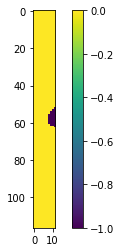

In [9]:
i,k = getSlicesImgs(t[1],12)
print(i[0].shape,t[1][0].shape)
print(k)
plt.imshow(i[0][3,:,:,0]);plt.colorbar()

In [10]:
import tensorflow as tf
from IPython.display import clear_output

def addPaddingTF(imgs):
    imgs = [imgs]
    at = []
    H=40#120#347
    W = 200#300
    for k,img1 in enumerate(imgs):
        img = imgs[k]
        if img.shape[0]!=H and int((H-img.shape[0])/2)>0:
            img = np.insert(img, [0]*int((H-img.shape[0])/2), 0, axis=0)
        if img.shape[0]!=H:
            img = np.insert(img, [img.shape[0]]*(H-img.shape[0]), 0, axis=0)
        if img.shape[1]!=W:
            img = np.insert(img, [img.shape[1]]*(W-img.shape[1]), 0, axis=1)
        at.append(img)
    return at[0]

def makeBatchesTFRecord(pathSave,pathXML,pathImgs,batchSize,words=False):
    if not os.path.exists(pathSave):
        os.makedirs(pathSave)
    totalT, totalI, totalL = [],[],[]
    nr=0
    maxle=0
    txtLD = {}
    dd,ll=0,0
    
    filenames = [f.replace(".txt", "") for f in os.listdir(pathXML)]
    
    count = 0
    for name in sorted(filenames):
#         if count % 500 == 0: print(count, end="\t")
#         count += 1
        
        xml = pathXML + name + ".txt"
#         name = xml.split('.txt')[0].split('/')[-1]
        img = pathImgs + name + '.png'
#         print(img)
        if img == "forms/g06-011p.png":
            break

        texts,imgs,lengths = processPage(xml,img,words)
        if texts is None or imgs is None or lengths is None:
            continue


        imgs,lengths = getSlicesImgs(imgs,24)




        totalT.extend(texts)
        totalI.extend(imgs)
        totalL.extend(lengths)

        if(len(totalT)>=batchSize):
            #save batch
            print(nr,'-l',maxle)
            if True:
                writer = tf.python_io.TFRecordWriter(pathSave+"handwritten-test-{}.tfrecords".format(nr), tf.python_io.TFRecordOptions(2))
                for ii in range(batchSize):
                    print(ii, 1, end = "\t")
#                     if totalI[ii].shape[0] < 50 or totalI[ii].shape[0] > 200 or \
#                     totalI[ii].shape[1]<10 or totalI[ii].shape[1]>40:
#                         print('error!!')
#                         continue
                    imgI = addPaddingTF(totalI[ii])  
                    print(ii, 2, end = "\t")  
                    # construct the Example proto boject
                    example = tf.train.Example(
                        # Example contains a Features proto object
                        features=tf.train.Features(
                          # Features contains a map of string to Feature proto objects
                          feature={
                            # A Feature contains one of either a int64_list,
                            # float_list, or bytes_list
                            'seq_len': tf.train.Feature(
                                int64_list=tf.train.Int64List(value=[totalL[ii]])),
                            'target': tf.train.Feature(
                                int64_list=tf.train.Int64List(value=totalT[ii].astype("int64"))),
                            'imageInput': tf.train.Feature(
                                float_list=tf.train.FloatList(value=(imgI).reshape(-1).astype("float"))),
                    }))
                    print(ii, 3, end = "\t")
                    # use the proto object to serialize the example to a string
                    serialized = example.SerializeToString()
                    print(ii, 4, end = "\t")
                    # write the serialized object to disk
                    writer.write(serialized)
                    print(ii, 5)
                writer.close()
            nr += 1  
            print(nr,'the file saved!')
            clear_output()
            totalT = totalT[batchSize:]
            totalI = totalI[batchSize:]
            totalL = totalL[batchSize:]
    target = open(pathSave+'readme.txt', 'w')
    target.write("max len text:"+str(maxle)+"\n")
    target.write("image shape:50x300 \n")
    target.close()
    

In [11]:
makeBatchesTFRecord('../data/batch/','../data/Transcriptions/',
                    '../data/Images_mod/',20,False)

14 -l 0
0 1	0 2	0 3	0 4	0 5
1 1	1 2	1 3	1 4	1 5
2 1	2 2	2 3	2 4	2 5
3 1	3 2	3 3	3 4	3 5
4 1	4 2	4 3	4 4	4 5
5 1	5 2	5 3	5 4	5 5
6 1	6 2	6 3	6 4	6 5
7 1	7 2	

KeyboardInterrupt: 